In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/KNN.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [16]:
df.shape

(101, 17)

In [17]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

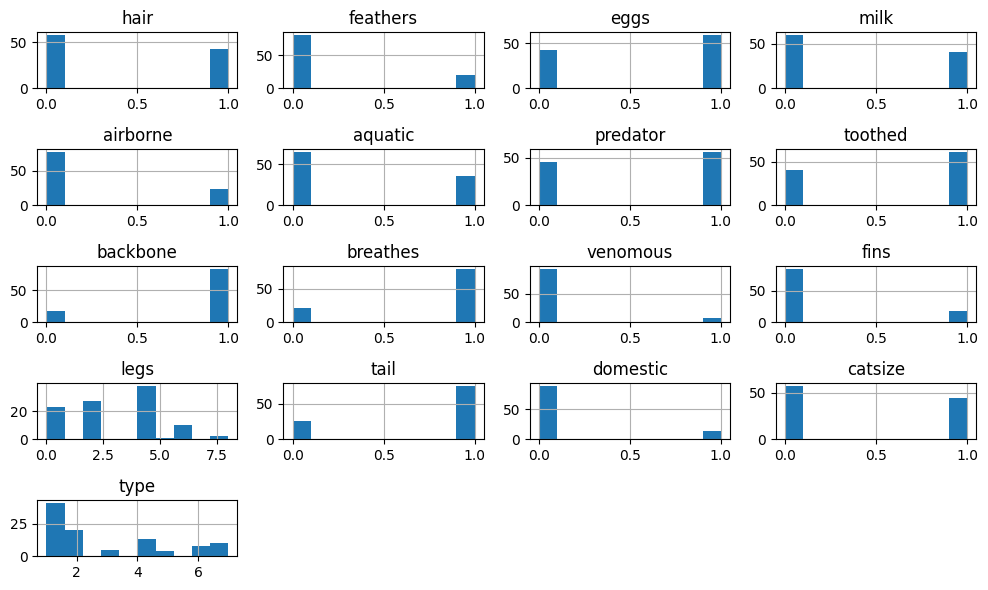

In [18]:
df.hist(figsize=(10, 6))
plt.tight_layout()

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


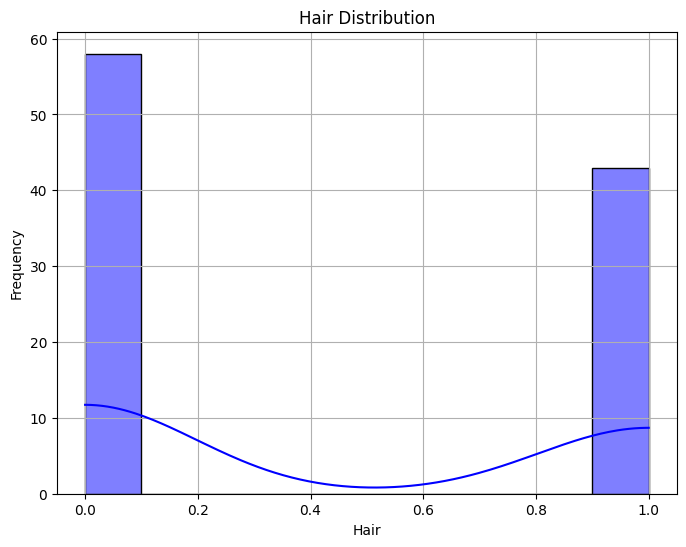

In [19]:
import seaborn as sns

# Assuming 'df' is your DataFrame and 'hair' is the column you want to plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='hair', kde=True, color='blue', bins=10)
plt.title('Hair Distribution')
plt.xlabel('Hair')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


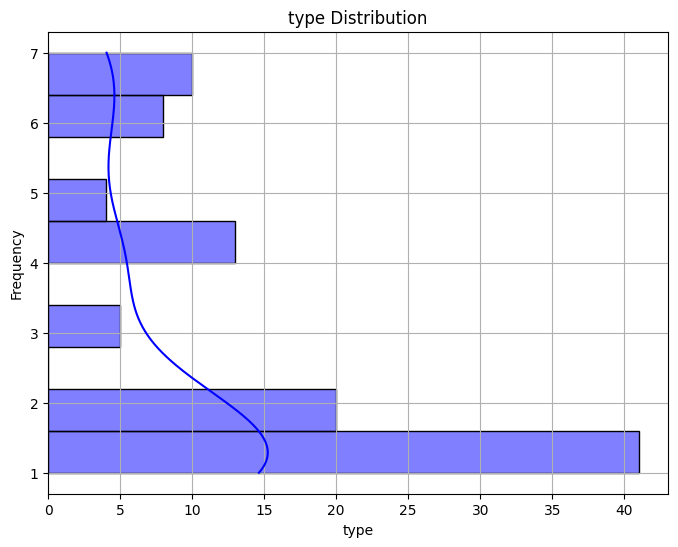

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, y='type', kde=True, color='blue', bins=10)
plt.title('type Distribution')
plt.xlabel('type')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3]:
# Drop the 'animal name' column if not needed for prediction
df = df.drop(columns=['animal name'], errors='ignore')

# Select the 'hair' column as the feature and 'type' as the target variable
X = df[['hair']]  # Feature
y = df['type']    # Target


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 80
Testing set size: 21


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier (choose an appropriate value for K)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the testing data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.5238095238095238
Precision: 0.48351648351648346
Recall: 0.5238095238095238
F1-Score: 0.5028571428571428


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


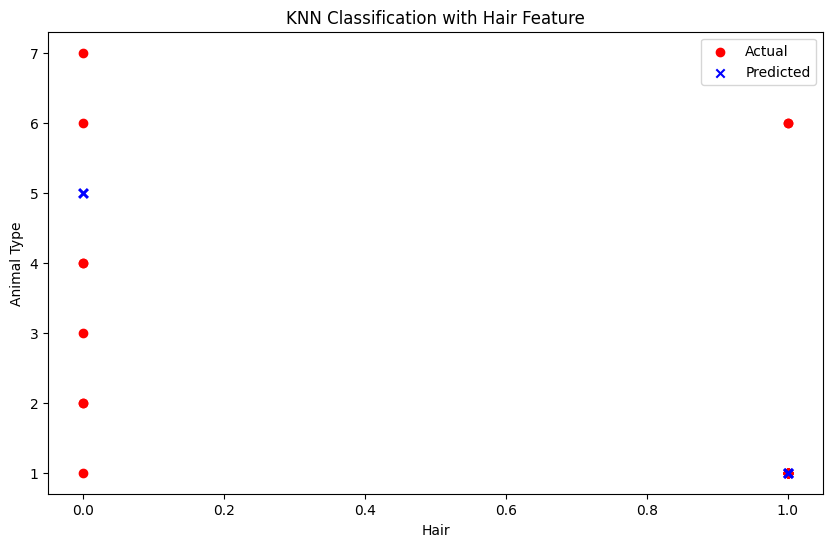

In [7]:
import matplotlib.pyplot as plt

# Plot the results (optional for single feature)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted', marker='x')
plt.xlabel('Hair')
plt.ylabel('Animal Type')
plt.title('KNN Classification with Hair Feature')
plt.legend()
plt.show()


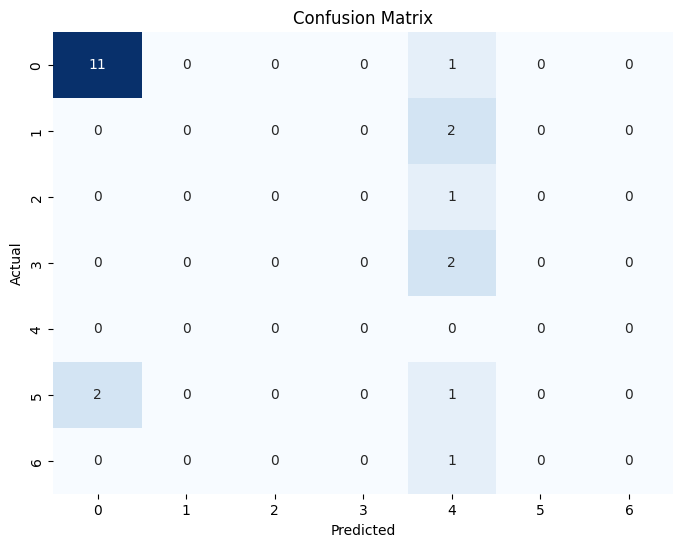

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


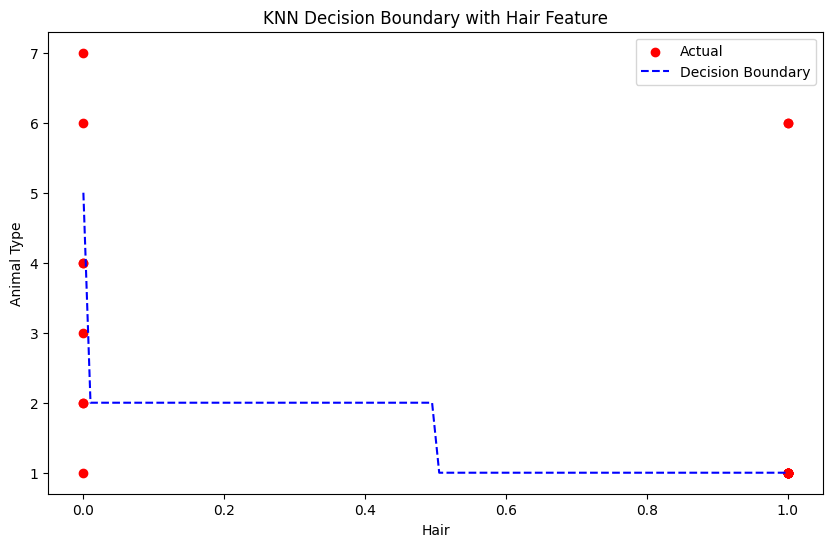

In [9]:
import numpy as np

# Generate data points for plotting decision boundary
X_vis = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vis = knn.predict(X_vis)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_vis, y_vis, color='blue', linestyle='--', label='Decision Boundary')
plt.xlabel('Hair')
plt.ylabel('Animal Type')
plt.title('KNN Decision Boundary with Hair Feature')
plt.legend()
plt.show()


What are the key hyperparameters in KNN?

The key hyperparameters in KNN are:
Number of Neighbors (K): The number of nearest neighbors to consider when making a prediction.
Distance Metric: The metric used to calculate the distance between data points (e.g., Euclidean, Manhattan).
Weighting Function: Whether all neighbors are weighted equally or closer neighbors have more influence (uniform or distance-based).bold text

 What distance metrics can be used in KNN?

Common distance metrics used in KNN include:
Euclidean Distance: The straight-line distance between two points in Euclidean space.
Manhattan Distance: The sum of the absolute differences between the coordinates of two points.
Minkowski Distance: A generalized form of Euclidean and Manhattan distances, controlled by a parameter p.
Hamming Distance: Used for categorical variables, the number of positions at which the corresponding elements are different.
Cosine Similarity: Measures the cosine of the angle between two non-zero vectors, useful for high-dimensional data.
